In [1]:
import os
import scipy.io
import numpy as np
import cv2

In [2]:
dataset = {
    'video_sequences' : [],
    'anomaly_sequences' : [],
    'optical_flow_frames' : [],
    'gt_frames' : []
}

In [3]:
video_paths = ['./UCSD_Anomaly_Dataset.v1p2/UCSDped1/Train/', './UCSD_Anomaly_Dataset.v1p2/UCSDped1/Test/', './UCSD_Anomaly_Dataset.v1p2/UCSDped1/Train/', './UCSD_Anomaly_Dataset.v1p2/UCSDped2/Test/']

blank_image = np.zeros((128, 128, 3))
blank_image_gt = np.zeros((128, 128))

for video_path in video_paths:
    for video in os.listdir(video_path):
        if not (video.endswith('_gt')):
            
            if not (video + '_gt') in os.listdir(video_path):
                chance = np.random.randint(10)
                if (chance >= 0.2):
                    continue
            
            #print(video)
            
            video_sequence = []
            anomaly_sequence = []
            optical_flow_frames = []
            
            for frame in os.listdir(video_path + video):
                if (frame.endswith('.DS_Store')):
                    continue
                    
                img = cv2.imread(video_path + video + '/' + frame)
                
                if (img is None):
                    continue
                
                img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
                img = cv2.resize(img, (128, 128))
                img = img.astype(np.float32)
                img = img/255
                video_sequence.append(img)
                
                if (len(video_sequence) == 1):
                    prev = img
                    optical_flow_mag = blank_image_gt
                else:
                    next = img
                    
                    flow = cv2.calcOpticalFlowFarneback(prev,next, None, 0.5, 3, 15, 3, 5, 1.2, 0)
                    
                    mag, ang = cv2.cartToPolar(flow[...,0], flow[...,1])
                    #hsv[...,0] = ang*180/np.pi/2
                    #hsv[...,2] = cv2.normalize(mag,None,0,255,cv2.NORM_MINMAX)
                    optical_flow_mag = cv2.normalize(mag,None,0,255,cv2.NORM_MINMAX)
                
                    #print(optical_flow_mag.shape)
                
                optical_flow_frames.append(optical_flow_mag)
                    
                    
            
            video_len = (len(video_sequence))
            op_flow_len = len(optical_flow_frames)
            print(op_flow_len)
            
            blank_frame_num = 200 - video_len
            
            for i in range(blank_frame_num):
                video_sequence.append(blank_image_gt)
                optical_flow_frames.append(blank_image_gt)
            
            
            if (video.startswith('Train')):
                anomaly_sequence = [0]*video_len
            elif (video.startswith('Test')):
                anomaly_sequence = [1]*video_len
            
            if (video + '_gt') in os.listdir(video_path):
                gt_video = video + '_gt/'
                
                gt_video_frames = []
                
                for frame in os.listdir(video_path + gt_video):
                    if (frame.endswith('.DS_Store')):
                        continue
                    img = cv2.imread(video_path + gt_video + frame)
                    
                    if (img is None):
                        continue
                    
                    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
                    img = cv2.resize(img, (128, 128))
                    img = img/255
                    gt_video_frames.append(img)
                
            else:
                
                gt_video_frames = []
                blank_frame_num = video_len
                
            for i in range(blank_frame_num):
                gt_video_frames.append(blank_image_gt)
            
            video_sequence = np.array(video_sequence)
            video_sequence = np.reshape(video_sequence, (200, 128, 128, 1))
            gt_video_frames = np.array(gt_video_frames)
            gt_video_frames = np.reshape(gt_video_frames, (200, 128, 128, 1))
            optical_flow_frames = np.array(optical_flow_frames)
            optical_flow_frames = np.reshape(optical_flow_frames, (200, 128, 128, 1))
            
            print(video_sequence.shape, gt_video_frames.shape, optical_flow_frames.shape)
            
            dataset['video_sequences'].append(video_sequence)
            dataset['anomaly_sequences'].append(anomaly_sequence)
            dataset['optical_flow_frames'].append(optical_flow_frames)
            dataset['gt_frames'].append(gt_video_frames)

200
(200, 128, 128, 1) (200, 128, 128, 1) (200, 128, 128, 1)
200
(200, 128, 128, 1) (200, 128, 128, 1) (200, 128, 128, 1)
200
(200, 128, 128, 1) (200, 128, 128, 1) (200, 128, 128, 1)
200
(200, 128, 128, 1) (200, 128, 128, 1) (200, 128, 128, 1)
200
(200, 128, 128, 1) (200, 128, 128, 1) (200, 128, 128, 1)
200
(200, 128, 128, 1) (200, 128, 128, 1) (200, 128, 128, 1)
200
(200, 128, 128, 1) (200, 128, 128, 1) (200, 128, 128, 1)
200
(200, 128, 128, 1) (200, 128, 128, 1) (200, 128, 128, 1)
200
(200, 128, 128, 1) (200, 128, 128, 1) (200, 128, 128, 1)
200
(200, 128, 128, 1) (200, 128, 128, 1) (200, 128, 128, 1)
200
(200, 128, 128, 1) (200, 128, 128, 1) (200, 128, 128, 1)
200
(200, 128, 128, 1) (200, 128, 128, 1) (200, 128, 128, 1)
200
(200, 128, 128, 1) (200, 128, 128, 1) (200, 128, 128, 1)
200
(200, 128, 128, 1) (200, 128, 128, 1) (200, 128, 128, 1)
200
(200, 128, 128, 1) (200, 128, 128, 1) (200, 128, 128, 1)
200
(200, 128, 128, 1) (200, 128, 128, 1) (200, 128, 128, 1)
200
(200, 128, 128, 1) (

In [ ]:
for i, video in enumerate(dataset['video_sequences']):
    for j, frame in enumerate(video):
        print(frame.shape)
        assert(frame.shape == (360, 240, 3))

In [ ]:
for i, video in enumerate(dataset['video_sequences']):
    
    print(len(video))
    print(len(dataset['gt_frames'][i]))
    
    print(i)
    assert(len(video) == len(dataset['gt_frames'][i]))

In [ ]:
from keras.layers import ConvLSTM2D, MaxPooling2D, Conv2DTranspose, TimeDistributed, Conv3D, Conv3DTranspose, UpSampling2D, Conv2D
from keras.models import Sequential

model = Sequential()

model.add(ConvLSTM2D(16, (3,3), padding = 'same', return_sequences = True, input_shape = (200, 200, 120, 3)))
model.add(ConvLSTM2D(16, (3,3), padding = 'same', return_sequences = True))
model.add(ConvLSTM2D(16, (3,3), padding = 'same', return_sequences = True))

model.add(TimeDistributed(MaxPooling2D(2,2)))

model.add(ConvLSTM2D(16, (3,3), padding = 'same', return_sequences = True))
model.add(ConvLSTM2D(16, (3,3), padding = 'same', return_sequences = True))
model.add(ConvLSTM2D(16, (3,3), padding = 'same', return_sequences = True))

model.add(TimeDistributed(MaxPooling2D(2,2)))

model.add(ConvLSTM2D(16, (3,3), padding = 'same', return_sequences = True))
model.add(ConvLSTM2D(16, (3,3), padding = 'same', return_sequences = True))
model.add(ConvLSTM2D(16, (3,3), padding = 'same', return_sequences = True))

model.add(TimeDistributed(MaxPooling2D(2,2)))
model.add(ConvLSTM2D(16, (3,3), padding = 'same', return_sequences = True))
model.add(ConvLSTM2D(16, (3,3), padding = 'same', return_sequences = True))
model.add(ConvLSTM2D(16, (3,3), padding = 'same', return_sequences = True))

model.add(TimeDistributed(UpSampling2D((2,2))))
model.add(TimeDistributed(Conv2D(16, (3,3), padding = 'same', activation = 'relu')))

model.add(TimeDistributed(UpSampling2D((2,2))))
model.add(TimeDistributed(Conv2D(16, (3,3), padding = 'same', activation = 'relu')))

model.add(TimeDistributed(UpSampling2D((2,2))))
model.add(TimeDistributed(Conv2D(16, (3,3), padding = 'same', activation = 'relu')))

model.add(TimeDistributed(Conv2D(1, (1,1), activation = 'sigmoid')))

model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

model.summary()

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle

dataset['video_sequences'] = np.array(dataset['video_sequences'])
dataset['gt_frames'] = np.array(dataset['gt_frames'])
dataset['optical_flow_frames'] = np.array(dataset['optical_flow_frames'])

dataset['video_sequences'], dataset['gt_frames'], dataset['optical_flow_frames'] = shuffle(dataset['video_sequences'], dataset['gt_frames'], dataset['optical_flow_frames'])

print(dataset['video_sequences'].shape, dataset['gt_frames'].shape, dataset['optical_flow_frames'].shape)

(30, 200, 128, 128, 1) (30, 200, 128, 128, 1) (30, 200, 128, 128, 1)


In [ ]:
hist = model.fit(dataset['video_sequences'], dataset['gt_frames'], epochs = 10, verbose = 1, validation_split = 0.1, batch_size = 1)

In [ ]:
from keras.layers import ConvLSTM2D, MaxPooling2D, Conv2DTranspose, TimeDistributed, Conv3D, Conv3DTranspose, UpSampling2D, Conv2D, MaxPooling3D, UpSampling3D
from keras.models import Sequential

model=Sequential()
model.add(Conv3D(filters=128,kernel_size=(10,3,3),padding='same',input_shape=(200, 128, 128, 3),activation='relu'))
model.add(MaxPooling3D((2,2,2)))
model.add(Conv3D(filters=64,kernel_size=(10,3,3),padding='same',activation='relu'))
model.add(MaxPooling3D((2,2,2)))
model.add(Conv3D(filters=32,kernel_size=(10,3,3),padding='same',activation='relu'))
model.add(MaxPooling3D((2,2,2)))
model.add(Conv3D(filters=16,kernel_size=(10,3,3),padding='same',activation='relu'))

#model.add(ConvLSTM2D(filters=16,kernel_size=(3,3),strides=1,padding='same',dropout=0.4,recurrent_dropout=0.3,return_sequences=True))
# model.add(ConvLSTM2D(filters=32,kernel_size=(3,3),strides=1,padding='same',dropout=0.3,return_sequences=True))
# model.add(ConvLSTM2D(filters=64,kernel_size=(3,3),strides=1,return_sequences=True, padding='same',dropout=0.5))

model.add(UpSampling3D((2,2,2)))
model.add(Conv3D(filters=16,kernel_size=(10,3,3),padding='same',activation='relu'))
model.add(UpSampling3D((2,2,2)))
model.add(Conv3D(filters=16,kernel_size=(10,3,3),padding='same',activation='relu'))
model.add(UpSampling3D((2,2,2)))
model.add(Conv3D(filters=1,kernel_size=(10,3,3),padding='same',activation='relu'))


# model.add(Conv3DTranspose(filters=128,kernel_size=(4,5,5),padding='valid',activation='sigmoid'))
# model.add(Conv3DTranspose(filters=1,kernel_size=(4,10,10),padding='valid',activation='sigmoid'))

model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

model.summary()


In [ ]:
from keras.layers import ConvLSTM2D, MaxPooling2D, Conv2DTranspose, TimeDistributed, Conv3D, Conv3DTranspose, UpSampling2D, Conv2D, MaxPooling3D, UpSampling3D, LSTM
from keras.layers import InputLayer, Flatten, Reshape
from keras.models import Sequential

model = Sequential()

model.add(InputLayer(input_shape=(200, 128, 128, 3)))

model.add(TimeDistributed(Conv2D(8, (3,3), input_shape = (200, 200, 3), activation = 'relu', padding = 'same')))
model.add(TimeDistributed(Conv2D(8, (3,3), activation = 'relu', padding = 'same')))
model.add(TimeDistributed(Conv2D(8, (3,3), activation = 'relu', padding = 'same')))

model.add(TimeDistributed(MaxPooling2D(2,2)))

model.add(TimeDistributed(Conv2D(8, (3,3), activation = 'relu', padding = 'same')))
model.add(TimeDistributed(Conv2D(8, (3,3), activation = 'relu', padding = 'same')))
model.add(TimeDistributed(Conv2D(8, (3,3), activation = 'relu', padding = 'same')))

model.add(TimeDistributed(MaxPooling2D(2,2)))

model.add(TimeDistributed(Conv2D(8, (3,3), activation = 'relu', padding = 'same')))
model.add(TimeDistributed(Conv2D(8, (3,3), activation = 'relu', padding = 'same')))
model.add(TimeDistributed(Conv2D(8, (3,3), activation = 'relu', padding = 'same')))

model.add(TimeDistributed(MaxPooling2D(2,2)))

model.add(TimeDistributed(Flatten()))

model.add(LSTM(256, return_sequences = True))

model.add(TimeDistributed(Reshape((16, 16, 1))))

model.add(TimeDistributed(UpSampling2D((2,2))))
model.add(TimeDistributed(Conv2D(8, (3,3), activation = 'relu', padding = 'same')))

model.add(TimeDistributed(UpSampling2D((2,2))))
model.add(TimeDistributed(Conv2D(8, (3,3), activation = 'relu', padding = 'same')))

model.add(TimeDistributed(UpSampling2D((2,2))))
model.add(TimeDistributed(Conv2D(1, (3,3), activation = 'sigmoid', padding = 'same')))

model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])


model.summary()

In [ ]:
import pickle

filename = 'video_data.pkl'

outfile = open(filename, 'wb')

pickle.dump(dataset, outfile)

outfile.close()

In [ ]:
import pickle

filename = 'video_data.pkl'

infile = open(filename,'rb')
dataset = pickle.load(infile)
infile.close()

In [ ]:
from keras import backend as K

K.clear_session()

In [ ]:
model.predict(dataset['video_sequences'])

In [ ]:
%matplotlib inline
from matplotlib import pyplot as plt


plt.plot(hist.history['acc'])
plt.plot(hist.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
np.random.randint(10)

In [ ]:
len(dataset['video_sequences'])

In [22]:
from keras.layers import Conv2D, MaxPooling2D, Conv3D, MaxPooling3D, UpSampling2D, TimeDistributed, Flatten, Reshape, LSTM, Input, concatenate
from keras.models import Model

img_input = Input(shape = (200, 128, 128, 1))

op_flow_input = Input(shape = (200, 128, 128, 1))

conv_2 = TimeDistributed(Conv2D(4, (3,3), padding = 'same', activation = 'relu'))(op_flow_input)
conv_2 = TimeDistributed(Conv2D(4, (3,3), padding = 'same', activation = 'relu'))(conv_2)
conv_2 = TimeDistributed(Conv2D(4, (3,3), padding = 'same', activation = 'relu'))(conv_2)

conv_2 = TimeDistributed(MaxPooling2D(2,2))(conv_2)

conv_1 = TimeDistributed(Conv2D(4, (3,3), padding = 'same', activation = 'relu'))(img_input)
conv_1 = TimeDistributed(Conv2D(4, (3,3), padding = 'same', activation = 'relu'))(conv_1)
conv_1 = TimeDistributed(Conv2D(4, (3,3), padding = 'same', activation = 'relu'))(conv_1)

conv_1 = TimeDistributed(MaxPooling2D(2,2))(conv_1)

concat = concatenate([conv_1, conv_2])

conv_3 = TimeDistributed(Conv2D(8, (3,3), padding = 'same', activation = 'relu'))(concat)
conv_3 = TimeDistributed(Conv2D(8, (3,3), padding = 'same', activation = 'relu'))(conv_3)
conv_3 = TimeDistributed(Conv2D(8, (3,3), padding = 'same', activation = 'relu'))(conv_3)

conv_3 = TimeDistributed(MaxPooling2D(2,2))(conv_3)

conv_3 = TimeDistributed(Conv2D(8, (3,3), padding = 'same', activation = 'relu'))(conv_3)
conv_3 = TimeDistributed(Conv2D(8, (3,3), padding = 'same', activation = 'relu'))(conv_3)
conv_3 = TimeDistributed(Conv2D(8, (3,3), padding = 'same', activation = 'relu'))(conv_3)

conv_3 = TimeDistributed(MaxPooling2D(2,2))(conv_3)

conv_3 = TimeDistributed(Conv2D(8, (3,3), padding = 'same', activation = 'relu'))(conv_3)
conv_3 = TimeDistributed(Conv2D(8, (3,3), padding = 'same', activation = 'relu'))(conv_3)
conv_3 = TimeDistributed(Conv2D(8, (3,3), padding = 'same', activation = 'relu'))(conv_3)

conv_3 = TimeDistributed(MaxPooling2D(2,2))(conv_3)

# conv_3 = TimeDistributed(Conv2D(8, (3,3), padding = 'same', activation = 'relu'))(concat)
# conv_3 = TimeDistributed(Conv2D(8, (3,3), padding = 'same', activation = 'relu'))(conv_3)
# conv_3 = TimeDistributed(Conv2D(8, (3,3), padding = 'same', activation = 'relu'))(conv_3)

# conv_3 = TimeDistributed(MaxPooling2D(2,2))(conv_3)

conv_3 = TimeDistributed(Flatten())(conv_3)

lstm_layer = LSTM(256, return_sequences = True)(conv_3)

reshape_layer = TimeDistributed(Reshape((16, 16, 1)))(lstm_layer)

decoder = TimeDistributed(UpSampling2D((2,2)))(reshape_layer)
decoder = TimeDistributed(Conv2D(8, (3,3), padding = 'same', activation = 'relu'))(decoder)

decoder = TimeDistributed(UpSampling2D((2,2)))(decoder)
decoder = TimeDistributed(Conv2D(8, (3,3), padding = 'same', activation = 'relu'))(decoder)

decoder = TimeDistributed(UpSampling2D((2,2)))(decoder)
output = TimeDistributed(Conv2D(1, (3,3), padding = 'same', activation = 'sigmoid'))(decoder)


model = Model(inputs = [img_input, op_flow_input], outputs = output)

model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_15 (InputLayer)           (None, 200, 128, 128 0                                            
__________________________________________________________________________________________________
input_16 (InputLayer)           (None, 200, 128, 128 0                                            
__________________________________________________________________________________________________
time_distributed_156 (TimeDistr (None, 200, 128, 128 40          input_15[0][0]                   
__________________________________________________________________________________________________
time_distributed_152 (TimeDistr (None, 200, 128, 128 40          input_16[0][0]                   
__________________________________________________________________________________________________
time_distr

In [25]:
hist = model.fit([dataset['video_sequences'], dataset['optical_flow_frames']], dataset['gt_frames'], verbose = 1, epochs = 10, validation_split = 0.1, batch_size = 1)

Train on 27 samples, validate on 3 samples
Epoch 1/10
27/27 [==============================] - ETA: 2s - loss: 0.5188 - acc: 0.939 - 85s 3s/step - loss: 0.5104 - acc: 0.9415 - val_loss: 0.2807 - val_acc: 0.9950
Epoch 2/10
27/27 [==============================] - 47s 2s/step - loss: 0.1190 - acc: 0.9935 - val_loss: 0.0398 - val_acc: 0.9950
Epoch 3/10
27/27 [==============================] - 47s 2s/step - loss: 0.0445 - acc: 0.9935 - val_loss: 0.0367 - val_acc: 0.9950
Epoch 4/10
27/27 [==============================] - 47s 2s/step - loss: 0.0445 - acc: 0.9935 - val_loss: 0.0358 - val_acc: 0.9950
Epoch 5/10
27/27 [==============================] - 47s 2s/step - loss: 0.0434 - acc: 0.9935 - val_loss: 0.0353 - val_acc: 0.9950
Epoch 6/10
27/27 [==============================] - 47s 2s/step - loss: 0.0429 - acc: 0.9935 - val_loss: 0.0350 - val_acc: 0.9950
Epoch 7/10
27/27 [==============================] - 48s 2s/step - loss: 0.0425 - acc: 0.9935 - val_loss: 0.0345 - val_acc: 0.9950
Epoch 8/1

In [12]:
import pydot
from keras.utils import plot_model

In [26]:
plot_model(model, 'model.png')

ImportError: Failed to import `pydot`. Please install `pydot`. For example with `pip install pydot`.

In [31]:
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot

SVG(model_to_dot(model).create(prog='dot', format='svg'))

ImportError: Failed to import `pydot`. Please install `pydot`. For example with `pip install pydot`.

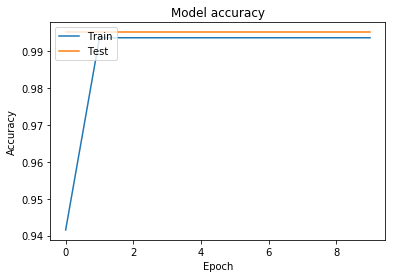

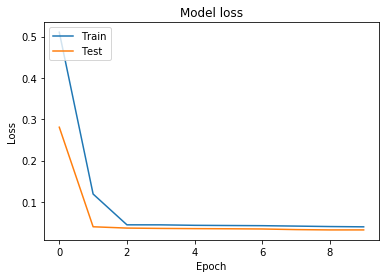

In [29]:
%matplotlib inline
from matplotlib import pyplot as plt

plt.plot(hist.history['acc'])
plt.plot(hist.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [36]:
import os
os.environ["PATH"] += os.pathsep + 'C:/Program Files (x86)/Graphviz2.38/bin/'

from keras.utils.vis_utils import plot_model

plot_model(model, 'model.png')

ImportError: Failed to import `pydot`. Please install `pydot`. For example with `pip install pydot`.

In [35]:
model.save('Op_flow_model.hdf5')